In [4]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [5]:
tokenizer = Tokenizer()

data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [6]:
# 문장 토큰화, 예측 모델을 훈련하려면 한 단 계 더 나아가 문장을 여러 개의 작은 문장으로 나누는 작업을 수행해야 함.
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

print(input_sequences[:7])

[[4, 2], [4, 2, 66], [4, 2, 66, 8], [4, 2, 66, 8, 67], [4, 2, 66, 8, 67, 68], [4, 2, 66, 8, 67, 68, 69], [4, 2, 66, 8, 67, 68, 69, 70]]


In [7]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                           maxlen=max_sequence_len, padding='pre'))

In [8]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1] # 입력 시퀀스에서 레이블을 분리하는 코드
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) # 레이블을 훈련에 사용할 수 있는 원-핫 인코딩으로 변환 -> to_categorical 함수 사용

In [9]:
print(xs[6])
print(ys[6])


[ 0  0  0  4  2 66  8 67 68 69]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
# 모델 만들기
model = Sequential()
model.add(Embedding(total_words, 8)) # 임베딩 층 :: 임베딩에서는 단어 하나당 벡터 하나가 필요. !!: 파라미터 개수는 전체 단어 수와 임베딩 차원 수의 곱이 됨.(단어 많지 않기에 8차원이면 충분)
model.add(Bidirectional(LSTM(max_sequence_len-1))) # LSTM 층 :: 양방향 LSTM 층을 만들고 뉴런 개수는 시퀀스 최대 길이보다 1 작게 지정함.
model.add(Dense(total_words, activation='softmax')) # 밀집 층 :: 전체 단어 개수의 뉴런을 가진 밀집 층임. 이 층의 각 뉴런은 입력값에 대해 다음 단어에 해당하는 모든 단어의 확률을 출력함.

2024-08-13 21:05:27.407616: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-08-13 21:05:27.407653: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-13 21:05:27.407663: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-13 21:05:27.407937: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-13 21:05:27.407968: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=10, verbose=1)

Epoch 1/10


2024-08-13 21:05:29.252914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.0082 - loss: 5.5718
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0597 - loss: 5.5622
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0584 - loss: 5.5523
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.0797 - loss: 5.5291
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0386 - loss: 5.4754
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0421 - loss: 5.3416
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.0465 - loss: 5.2280
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.0463 - loss: 5.0968
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0570 - loss: 5.0769
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.0389 - loss: 5.0129


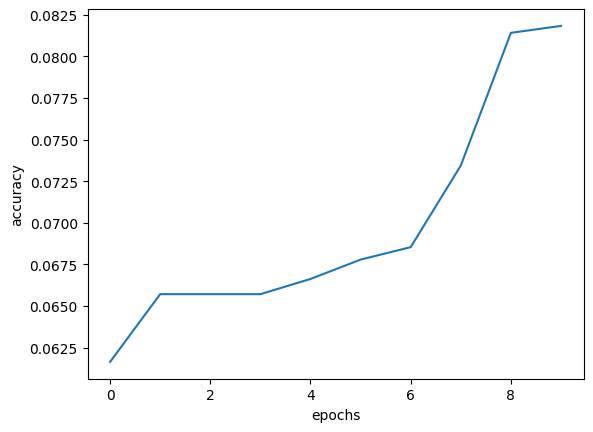

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [12]:
seed_text = "in the town of athy"

In [13]:
# texts_to_sequences 메서드를 사용해 토큰으로 바꾸어야 함.
token_list = tokenizer.texts_to_sequences([seed_text])[0] # 하나의 값만 전달하지만 배열을 반환하기 때문에 반환하는 배열의 첫 번째 원소를 선택한다.

In [25]:
# 다음으로 훈련 데이터와 동일한 크기로 만들기 위해 패딩을 추가한다.
token_list = pad_sequences([token_list],
                           maxlen=max_sequence_len-1, padding='pre')

In [26]:
# 토큰 리스트의 다음 단어를 예측하기 위해 model.predict를 호출한다.
predicted = np.argmax(model.predict(token_list), axis=-1) # model.predict()는 말뭉치에 있는 각 단어에 대한 확률을 반환한다. -> np.argmax 함수에 전달 -> 가장 큰 인덱스
print(predicted) # 반환값: 68

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step
[1]


In [27]:
tokenizer.index_word[68]

'fair'

In [28]:
# 예츨을 연결해 텍스트 생성하기
seed_text = "sweet jeremy saw dublin"
next_words=5
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
sweet jeremy saw dublin was the heart and the


횡설수설한 문장이 되어버렸다!!!???

1. 훈련 텍스트가 정말 작아 사용할 문맥이 거의 없기 때문
2. 시퀀스의 다음 단어 예측이 이전 단어에 의존하기 때문


In [15]:
data = open('./irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")

In [16]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [17]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [18]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                           maxlen=max_sequence_len, padding='pre'))

In [19]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [20]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))


In [21]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=10)

Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.0501 - loss: 7.1919
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.0627 - loss: 6.4219
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.0665 - loss: 6.3118
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.0660 - loss: 6.2509
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.0678 - loss: 6.1883
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.0654 - loss: 6.1666
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.0691 - loss: 6.1023
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.0734 - loss: 5.9935
Epoch 9/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.0821 - loss: 5.8856
Epoch 10/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.0845 - loss: 5.8486


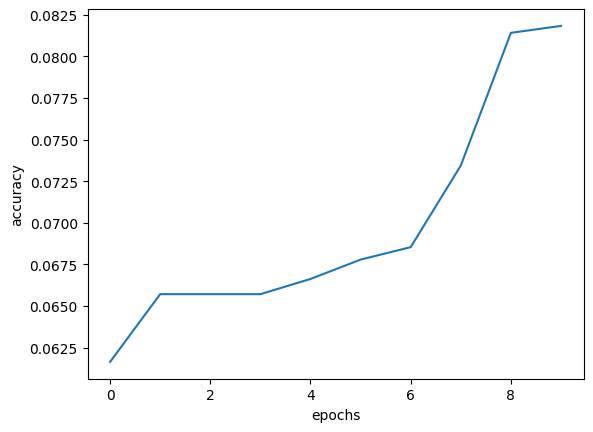

In [29]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [30]:
# 모델을 향상할 수 있는 한 가지 방법은 여러 개의 LSTM 층을 쌓는 형식으로 구조를 변경하는 것.
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1, return_sequences='True')))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=10, verbose=1)

Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 45s 112ms/step - accuracy: 0.0630 - loss: 7.1543
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.0654 - loss: 6.4079
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.0630 - loss: 6.2918
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.0650 - loss: 6.2067
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - accuracy: 0.0706 - loss: 6.1305
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.0766 - loss: 6.0864
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 45s 118ms/step - accuracy: 0.0791 - loss: 6.0211
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.0778 - loss: 5.9946
Epoch 9/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - accuracy: 0.0807 - loss: 5.9792
Epoch 10/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - accuracy: 0.0849 - loss: 5.9015


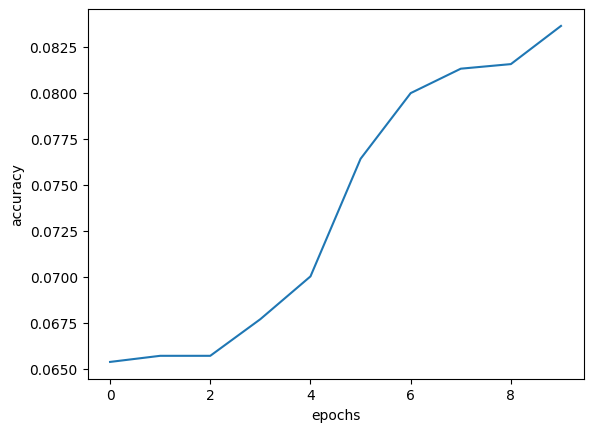

In [31]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [32]:
# 데이터 개선하기
window_size = 10
sentences = []
alltext = []
data = open('irish-lyrics-eof.txt').read()
corpus = data.lower()
words = corpus.split(" ")
range_size = len(words)-window_size
for i in range(0, range_size):
    thissentence=""
    for word in range(0, window_size-1):
        word = words[i+word]
        thissentence = thissentence + word
        thissentence = thissentence + " "
    sentences.append(thissentence)


In [34]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(window_size-1, return_sequences='True')))
model.add(Bidirectional(LSTM(window_size-1)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
history = model.fit(xs, ys, epochs=10, verbose=1)

Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 49s 121ms/step - accuracy: 0.0623 - loss: 7.2706
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - accuracy: 0.0658 - loss: 6.4327
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.0672 - loss: 6.2952
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 46s 121ms/step - accuracy: 0.0674 - loss: 6.2340
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.0701 - loss: 6.1717
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 45s 120ms/step - accuracy: 0.0643 - loss: 6.1525
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 45s 120ms/step - accuracy: 0.0689 - loss: 6.1161
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - accuracy: 0.0691 - loss: 6.0687
Epoch 9/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 45s 119ms/step - accuracy: 0.0705 - loss: 6.0568
Epoch 10/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 46s 121ms/step - accuracy: 0.0757 - loss: 5.9943


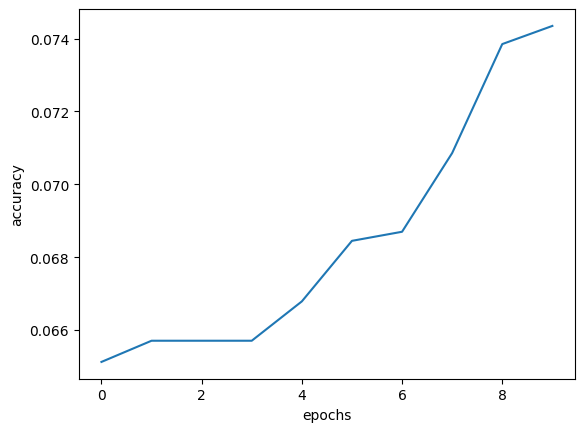

In [35]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [36]:
seed_text = "sweet jeremy saw dublin"
next_words=10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=window_size-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
sweet jeremy saw dublin love the love the heart the heart of of of


In [37]:
# 하이퍼 파라미터 변경
# 윈도 크기를 변경하면 훈련 데이터의 양 바뀜 (윈도 크기가 작으면 데이터가 더 많이 만들어지지만 하나의 레이블에 매핑되는 단어는 더 적어짐.)
# 임베딩 차원, LSTM의 뉴런 개수, 어휘 사전 크기
window_size = 6 #//
sentences = []
alltext = []
range_size = len(words)-window_size
for i in range(0, range_size):
    thissentence=""
    for word in range(0, window_size-1):
        word = words[i+word]
        thissentence = thissentence + word
        thissentence = thissentence + " "
    sentences.append(thissentence)

In [38]:
model = Sequential()
model.add(Embedding(total_words, 16)) #//
model.add(Bidirectional(LSTM(32, return_sequences='True')))#//
model.add(Bidirectional(LSTM(32)))#//
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, 
              metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 51s 125ms/step - accuracy: 0.0610 - loss: 6.8649
Epoch 2/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step - accuracy: 0.0712 - loss: 6.2266
Epoch 3/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step - accuracy: 0.0879 - loss: 5.9472
Epoch 4/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 47s 126ms/step - accuracy: 0.1052 - loss: 5.6542
Epoch 5/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 47s 125ms/step - accuracy: 0.1192 - loss: 5.3972
Epoch 6/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 46s 121ms/step - accuracy: 0.1307 - loss: 5.1700
Epoch 7/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 46s 123ms/step - accuracy: 0.1489 - loss: 4.9528
Epoch 8/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step - accuracy: 0.1576 - loss: 4.7667
Epoch 9/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step - accuracy: 0.1706 - loss: 4.5906
Epoch 10/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 47s 124ms/step - accuracy: 0.1919 - loss: 4.3761
Epoch 11/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 48s 127ms/step - accuracy: 0.1986 - loss: 4.1981
Epoch 12

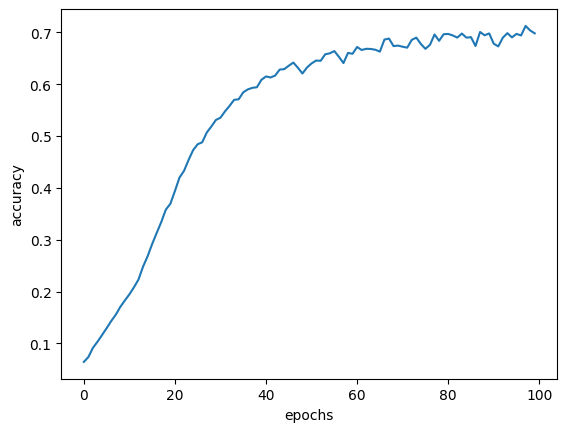

In [39]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [40]:
seed_text = "sweet jeremy saw dublin"
next_words=10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=window_size-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
sweet jeremy saw dublin look on gallant and well borne and green and come
